In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# Reading Data

In [25]:
data_df = pd.read_csv('drug_dataset.csv')
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Visualizing Data

In [26]:
# Generating colors for each unique value in the data
def get_color_map(data):
    items = np.unique(data)
    item_colors = {}
    colors_item = {}
    for item in items:
        new_color = np.random.randint(0, items.__len__() + 1)
        while new_color in colors_item:
            new_color = np.random.randint(0, items.__len__() + 1)
        item_colors[item] = new_color
        colors_item[new_color] = item

    data_item_colors = []
    for i in data:
        data_item_colors.append(item_colors[i])
    return data_item_colors, colors_item

# Returns the label for the color
def get_color_label(color_dict, label):
    return color_dict[int(label[label.index('{') + 1: label.index('}')])]

In [27]:
data_drug_colors, colors_drug = get_color_map(data_df.Drug)

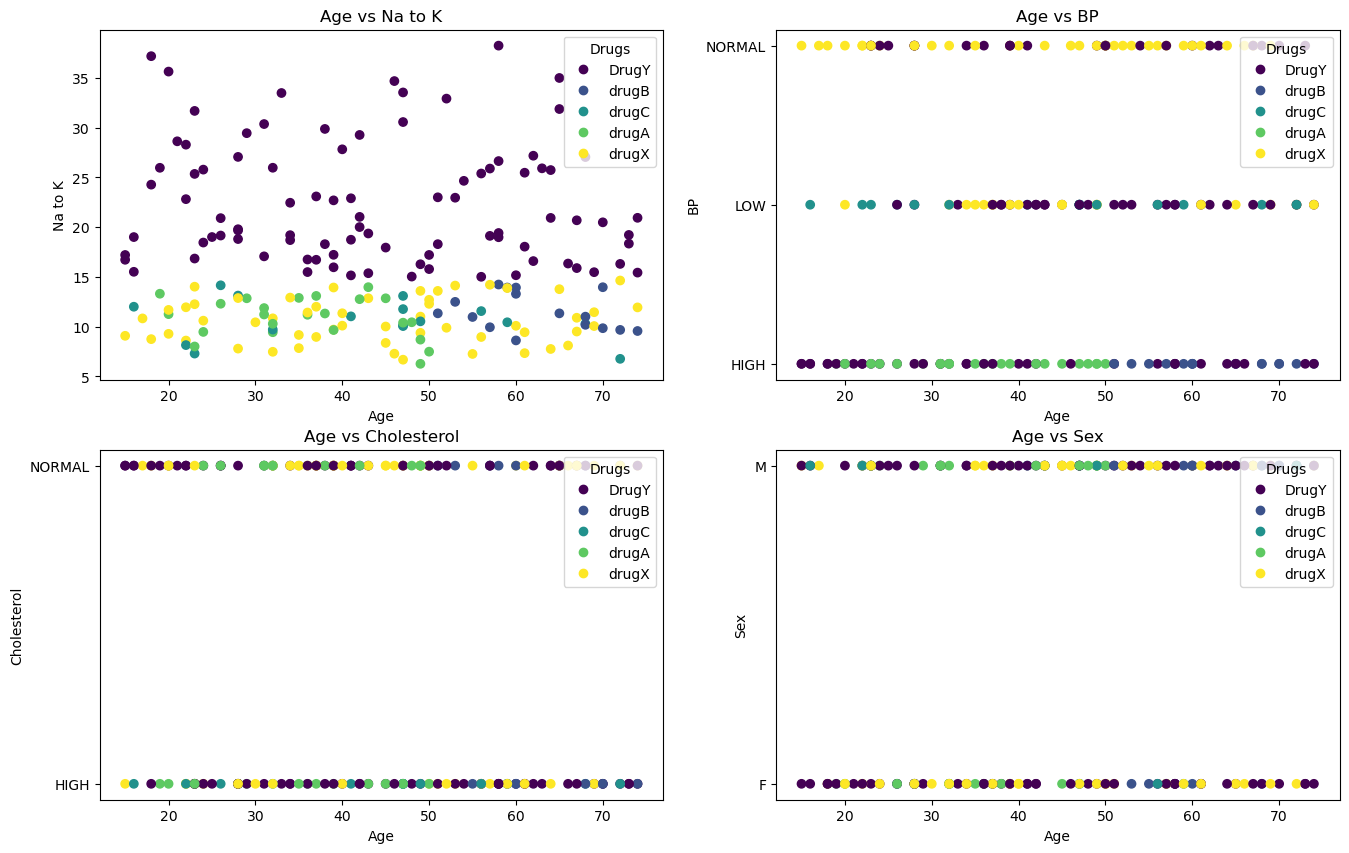

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Displaying Different Drugs given to people of different age and Na to K values
scatter = axs[0, 0].scatter(data_df.Age, data_df.Na_to_K, c = data_drug_colors)
axs[0, 0].title.set_text('Age vs Na to K')
plt.setp(axs[0, 0], xlabel='Age', ylabel= 'Na to K')
colors, labels = scatter.legend_elements()
axs[0, 0].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and BP Vs Drug Type
scatter = axs[0, 1].scatter(data_df.Age, data_df.BP, c = data_drug_colors)
axs[0, 1].title.set_text('Age vs BP')
plt.setp(axs[0, 1], xlabel='Age', ylabel= 'BP')
colors, labels = scatter.legend_elements()
axs[0, 1].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and Cholesterol Vs Drug Type
scatter = axs[1, 0].scatter(data_df.Age, data_df.Cholesterol, c = data_drug_colors)
axs[1, 0].title.set_text('Age vs Cholesterol')
plt.setp(axs[1, 0], xlabel='Age', ylabel= 'Cholesterol')
colors, labels = scatter.legend_elements()
axs[1, 0].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Age and Sex Vs Drug Type
scatter = axs[1, 1].scatter(data_df.Age, data_df.Sex, c = data_drug_colors)
axs[1, 1].title.set_text('Age vs Sex')
plt.setp(axs[1, 1], xlabel='Age', ylabel= 'Sex')
colors, labels = scatter.legend_elements()
axs[1, 1].legend(colors, [get_color_label(colors_drug, d) for d in labels], loc = 'upper right', title = 'Drugs')

# Preprocessing and Normalizing Data

In [29]:
# Converts categorical value to numerical values
def categorical_to_numerical(df, column_name):
    unique_values = np.unique(df[column_name])
    unique_nums = list(range(0, unique_values.__len__()))
    df[column_name] = df[column_name].replace(unique_values, unique_nums)

In [30]:
# Normalizes the features
def normalize(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    df[column] = (df[column] - mean) / std
    return (mean, std)

In [31]:
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [32]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
labels = ['Drug']

# Splitting data
X_df = data_df[features]
y_df = pd.DataFrame(data_df[labels])

# Converting categorical values to numbers
categorical_to_numerical(X_df, 'Sex')
categorical_to_numerical(X_df, 'BP')
categorical_to_numerical(X_df, 'Cholesterol')
categorical_to_numerical(y_df, 'Drug')

C:\Users\asimw\AppData\Local\Temp\ipykernel_13032\1601981081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(unique_values, unique_nums)


In [33]:
# Normalizing only Age and Na to K and leaving categorical features as it is
normalized_dict = {}
normalized_dict['Age'] = normalize(X_df, 'Age')
normalized_dict['Na_to_K'] = normalize(X_df, 'Na_to_K')

C:\Users\asimw\AppData\Local\Temp\ipykernel_13032\428396645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mean) / std


# Training Model

In [227]:
# Predicts value based on weights and features
def predict(theta, X):
    return 1 / (1 + np.exp(-np.dot(theta, np.transpose(X))))

# Returns cost of the outputs
def cost(theta, X, y, lam, num_labels):
    m = y.shape[0]
    J = 0
    temp_theta = np.array(theta)
    temp_theta[:, 0] = 0
    prediction = predict(theta, X)
    for i in range(0, num_labels):
        temp_y = y == i
        temp_prediction = np.transpose(prediction[i])
        J += (1 / m) * np.sum(-np.multiply(temp_y, np.log(temp_prediction)) - np.multiply((1 - temp_y), np.log(1 - temp_prediction))) + (lam / (2 * m)) * np.sum(np.square(temp_theta))
    return J

# Returns the updated values of the parameter theta
def gradient(theta, X, y, alpha, lam, num_labels):
    m = y.shape[0]
    n = X.shape[1]
    temp_theta = np.array(theta)
    temp_theta[:, 0] = 0
    regularized_grads = np.zeros(theta.shape)
    prediction = predict(theta, X)
    for i in range(0, num_labels):
        temp_y = y == i
        temp_prediction = np.transpose(prediction[i])
        temp_prediction = np.reshape(temp_prediction, (-1, 1))
        regularized_grads[i] = (alpha / m) * np.dot(np.transpose(temp_prediction - temp_y), X) + (lam / m) * np.reshape(temp_theta[i], (1, -1))
    return theta - regularized_grads

# Returns the accuracy in percentage
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

# Check whether the graident calculations are correct or not
def checkGradient(theta, X, y, lamda, num_labels):
    epsilon = 1E-4
    i, j = theta.shape
    numericalGrads = np.zeros(theta.shape)
    preturb = np.zeros(theta.shape)
    for r in range(0, i):
        for c in range(0, j):
            preturb[r, c] = theta[r, c]
            value = (cost(theta + preturb, X, y, lamda, num_labels) - cost(theta - preturb, X, y, lamda, num_labels)) / (2 * epsilon)
            numericalGrads[r, c] = value
            preturb[r, c] = 0
    return np.linalg.norm(numericalGrads - theta) / np.linalg.norm(numericalGrads + theta)

Splitting Data in training and testing sets

In [230]:
t = np.zeros((3, 2))
x = np.array([[1, 2], [3 ,4], [5, 6]])
y_t = np.array([[1], [2], [3]])
lamda = 0
num_labels = 3
print('Before Gradient')
print(t)
nmgrad = checkGradient(t, x, y_t, lamda, num_labels)
print(nmgrad)

print('Showing Difference')
print()

for i in range(50):
    t = gradient(t, x, y_t, 0.01, lamda, num_labels)

print('After Gradient')
print(t)
nmgrad = checkGradient(t, x, y_t, lamda, num_labels)
print(nmgrad)

print('Showing Difference')
print(np.linalg.norm(nmgrad - t) / np.linalg.norm(nmgrad + t))

Before Gradient
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
Showing Difference
nan
After Gradient
[[-0.26465429 -0.37727099]
 [-0.20740259 -0.18780831]
 [-0.06173284 -0.09444991]]
[[-1.94033650e+03 -4.98558123e+03]
 [ 2.97908752e+03  3.24250264e+03]
 [-2.94449519e+00 -1.17797193e+02]]
Showing Difference
0.9999509044317902


C:\Users\asimw\AppData\Local\Temp\ipykernel_13032\615638968.py:12: RuntimeWarning: invalid value encountered in double_scalars
  print(np.linalg.norm(nmgrad - t) / np.linalg.norm(nmgrad + t))


In [231]:
m, n = X_df.shape
split_percentage = 0.95
total_training_samples = int(m * split_percentage)
training_samples = np.random.choice(m, total_training_samples)
testing_samples = np.delete(list(range(0, m)), training_samples)

# Defining training and testing sets
X = np.array(X_df)

# Concatenating 1 to the begining of each row
ones = np.ones((m, 1))
X = np.concatenate((ones, X), axis=1)

y = np.array(y_df)
X_train = X[training_samples]
y_train = y[training_samples]
X_test = X[testing_samples]
y_test = y[testing_samples]

In [232]:
# Shapes of Training and Testing sets
print('Training Set')
print(X_train.shape, y_train.shape)
print('Testing Set')
print(X_test.shape, y_test.shape)

Training Set
(190, 6) (190, 1)
Testing Set
(78, 6) (78, 1)


## Defining Required Variables

In [233]:
num_labels = np.unique(y_df).__len__()
num_features = X_df.shape[1]
theta = np.random.rand(num_labels, num_features + 1)
lam = 2
learning_rate = 0.01
epochs = 500
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

In [234]:
X_train.shape, theta.shape

((190, 6), (5, 6))

In [235]:
for epoch in tqdm(range(1, epochs)):
    # Finding the training loss
    training_loss = cost(theta, X_train, y_train, lam, num_labels)
    # Finding the validation loss
    validation_loss = cost(theta, X_test, y_test, lam, num_labels)
    # Finding the training accuracy
    training_pred = predict(theta, X_train)
    training_accuracy = accuracy(np.argmax(np.transpose(training_pred), 1), y_train)
    # Finding the validation accuracy
    validation_pred = predict(theta, X_test)
    validation_accuracy = accuracy(np.argmax(np.transpose(validation_pred), 1), y_test)
    # Updating the theta
    theta = gradient(theta, X_train, y_train, learning_rate, lam, num_labels)
    # Displaying information
    print(f'Epoch: {epoch}, Training Loss: {round(training_loss, 2)}, Training Acc: {round(training_accuracy, 2)}, Validation Loss: {round(validation_loss, 2)}, Validation Acc: {round(validation_accuracy, 2)}')
    # Storing the data in the history
    history['loss'].append(training_loss)
    history['accuracy'].append(training_accuracy)
    history['val_loss'].append(validation_loss)
    history['val_accuracy'].append(validation_accuracy)

 27%|██▋       | 135/499 [00:00<00:00, 679.25it/s]

Epoch: 1, Training Loss: 1518.06, Training Acc: 19.22, Validation Loss: 613.61, Validation Acc: 7.9
Epoch: 2, Training Loss: 1500.96, Training Acc: 19.01, Validation Loss: 606.83, Validation Acc: 7.95
Epoch: 3, Training Loss: 1484.11, Training Acc: 19.1, Validation Loss: 600.15, Validation Acc: 7.95
Epoch: 4, Training Loss: 1467.49, Training Acc: 19.1, Validation Loss: 593.57, Validation Acc: 7.95
Epoch: 5, Training Loss: 1451.12, Training Acc: 19.2, Validation Loss: 587.08, Validation Acc: 7.95
Epoch: 6, Training Loss: 1434.98, Training Acc: 19.2, Validation Loss: 580.69, Validation Acc: 7.78
Epoch: 7, Training Loss: 1419.08, Training Acc: 18.94, Validation Loss: 574.39, Validation Acc: 7.78
Epoch: 8, Training Loss: 1403.42, Training Acc: 18.94, Validation Loss: 568.18, Validation Acc: 7.83
Epoch: 9, Training Loss: 1387.99, Training Acc: 18.94, Validation Loss: 562.07, Validation Acc: 7.83
Epoch: 10, Training Loss: 1372.8, Training Acc: 18.94, Validation Loss: 556.05, Validation Acc: 

 55%|█████▍    | 274/499 [00:00<00:00, 689.41it/s]

Epoch: 136, Training Loss: 623.42, Training Acc: 56.38, Validation Loss: 256.04, Validation Acc: 23.21
Epoch: 137, Training Loss: 621.93, Training Acc: 56.18, Validation Loss: 255.42, Validation Acc: 23.37
Epoch: 138, Training Loss: 620.47, Training Acc: 56.18, Validation Loss: 254.82, Validation Acc: 23.69
Epoch: 139, Training Loss: 619.03, Training Acc: 56.18, Validation Loss: 254.22, Validation Acc: 23.69
Epoch: 140, Training Loss: 617.61, Training Acc: 56.18, Validation Loss: 253.63, Validation Acc: 23.86
Epoch: 141, Training Loss: 616.21, Training Acc: 57.34, Validation Loss: 253.05, Validation Acc: 23.86
Epoch: 142, Training Loss: 614.84, Training Acc: 57.34, Validation Loss: 252.48, Validation Acc: 23.86
Epoch: 143, Training Loss: 613.49, Training Acc: 57.34, Validation Loss: 251.92, Validation Acc: 24.22
Epoch: 144, Training Loss: 612.15, Training Acc: 57.34, Validation Loss: 251.36, Validation Acc: 24.22
Epoch: 145, Training Loss: 610.84, Training Acc: 57.34, Validation Loss: 

 83%|████████▎ | 416/499 [00:00<00:00, 689.57it/s]

Epoch: 275, Training Loss: 524.45, Training Acc: 70.25, Validation Loss: 214.46, Validation Acc: 30.23
Epoch: 276, Training Loss: 524.1, Training Acc: 70.45, Validation Loss: 214.31, Validation Acc: 30.23
Epoch: 277, Training Loss: 523.75, Training Acc: 70.45, Validation Loss: 214.16, Validation Acc: 30.23
Epoch: 278, Training Loss: 523.41, Training Acc: 70.85, Validation Loss: 214.01, Validation Acc: 30.23
Epoch: 279, Training Loss: 523.06, Training Acc: 70.85, Validation Loss: 213.87, Validation Acc: 30.23
Epoch: 280, Training Loss: 522.72, Training Acc: 70.85, Validation Loss: 213.72, Validation Acc: 30.23
Epoch: 281, Training Loss: 522.38, Training Acc: 70.85, Validation Loss: 213.58, Validation Acc: 30.23
Epoch: 282, Training Loss: 522.05, Training Acc: 70.85, Validation Loss: 213.44, Validation Acc: 30.23
Epoch: 283, Training Loss: 521.71, Training Acc: 70.85, Validation Loss: 213.29, Validation Acc: 30.23
Epoch: 284, Training Loss: 521.38, Training Acc: 70.85, Validation Loss: 2

100%|██████████| 499/499 [00:00<00:00, 676.88it/s]

Epoch: 417, Training Loss: 489.34, Training Acc: 78.6, Validation Loss: 199.51, Validation Acc: 32.54
Epoch: 418, Training Loss: 489.16, Training Acc: 78.6, Validation Loss: 199.43, Validation Acc: 32.54
Epoch: 419, Training Loss: 488.98, Training Acc: 78.6, Validation Loss: 199.35, Validation Acc: 32.54
Epoch: 420, Training Loss: 488.81, Training Acc: 78.6, Validation Loss: 199.28, Validation Acc: 32.54
Epoch: 421, Training Loss: 488.63, Training Acc: 78.6, Validation Loss: 199.2, Validation Acc: 32.54
Epoch: 422, Training Loss: 488.45, Training Acc: 78.6, Validation Loss: 199.13, Validation Acc: 32.54
Epoch: 423, Training Loss: 488.28, Training Acc: 78.6, Validation Loss: 199.05, Validation Acc: 32.54
Epoch: 424, Training Loss: 488.1, Training Acc: 78.6, Validation Loss: 198.98, Validation Acc: 32.54
Epoch: 425, Training Loss: 487.93, Training Acc: 78.6, Validation Loss: 198.91, Validation Acc: 32.54
Epoch: 426, Training Loss: 487.76, Training Acc: 78.6, Validation Loss: 198.83, Vali

# Visualizing Results

In [237]:
np.sum(checkGradient(theta, X_train, y_train, lamda, num_labels))

-1033007.0172452297

Text(0.5, 1.0, 'Loss & Validation Loss vs Training Epochs')

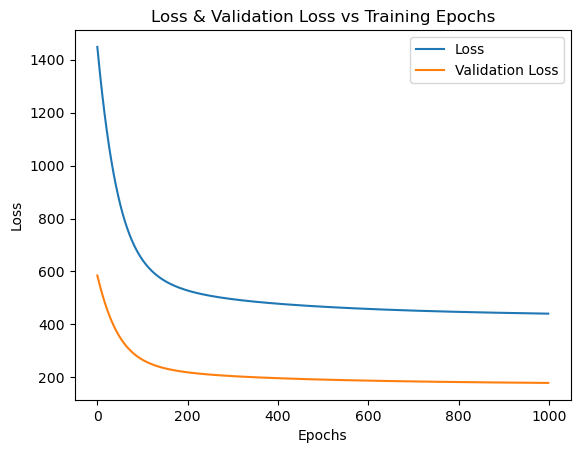

In [194]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss & Validation Loss vs Training Epochs')

Text(0.5, 1.0, 'Accuracy & Validation Accuracy vs Training Epochs')

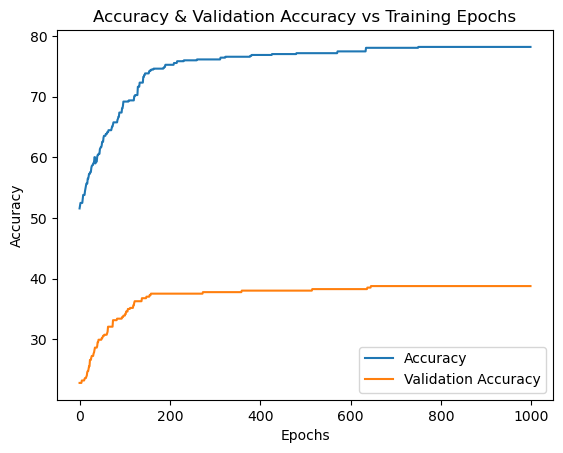

In [195]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy & Validation Accuracy vs Training Epochs')